In [ ]:
! wget http://raw.githubusercontent.com/kulkarnikaustubh/pokegan/master/pokemon_arrays.pkl

--2020-07-29 16:43:59--  http://raw.githubusercontent.com/kulkarnikaustubh/pokegan/master/pokemon_arrays.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/kulkarnikaustubh/pokegan/master/pokemon_arrays.pkl [following]
--2020-07-29 16:43:59--  https://raw.githubusercontent.com/kulkarnikaustubh/pokegan/master/pokemon_arrays.pkl
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84202244 (80M) [application/octet-stream]
Saving to: ‘pokemon_arrays.pkl’

pokemon_arrays.pkl  100%[===================>]  80.30M  76.3MB/s    in 1.1s    

2020-07-29 16:44:04 (76.3 MB/s) - ‘pokemon_arrays.pkl’ saved [84202244/84202244]


In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.2.0
Eager execution: True


In [ ]:
# loading the dataset
file = open('pokemon_arrays.pkl', 'rb')
images = pickle.load(file)
file.close()

print("Number of images = " + str(len(images)))
print("Shape of each image = " + str(images[0].shape))

Number of images = 2803
Shape of each image = (100, 100, 3)


In [68]:
# reshaping the data
X_train = np.reshape(images, (len(images), 100, 100, 3))

print(X_train.shape)

print(X_train[0][1])

(2803, 100, 100, 3)
[[136 124 252]
 [144 128 250]
 [160 142 252]
 [176 155 252]
 [189 166 255]
 [190 169 252]
 [196 175 255]
 [204 176 254]
 [203 174 253]
 [202 172 254]
 [199 165 252]
 [201 160 251]
 [207 156 253]
 [210 155 252]
 [211 161 252]
 [212 163 252]
 [211 165 253]
 [214 168 254]
 [213 171 254]
 [211 171 253]
 [212 171 252]
 [222 169 255]
 [220 166 255]
 [218 162 251]
 [220 162 253]
 [219 159 253]
 [218 155 251]
 [222 157 253]
 [231 149 251]
 [235 154 249]
 [245 171 253]
 [253 188 254]
 [252 200 253]
 [254 213 253]
 [254 222 254]
 [249 228 250]
 [249 230 251]
 [251 233 254]
 [249 233 252]
 [247 233 250]
 [247 233 249]
 [245 233 249]
 [252 236 252]
 [250 234 251]
 [249 233 250]
 [250 234 251]
 [251 235 252]
 [252 236 253]
 [253 237 254]
 [255 237 254]
 [254 234 253]
 [252 230 253]
 [252 227 253]
 [254 226 255]
 [252 223 254]
 [251 222 253]
 [248 225 248]
 [247 228 248]
 [248 230 248]
 [249 231 249]
 [253 232 254]
 [254 227 253]
 [251 220 251]
 [242 216 255]
 [238 210 255]
 [232

In [69]:
# normalizing
X_train = X_train/255.
print(X_train.shape)
print(X_train[0][1])

(2803, 100, 100, 3)
[[0.53333333 0.48627451 0.98823529]
 [0.56470588 0.50196078 0.98039216]
 [0.62745098 0.55686275 0.98823529]
 [0.69019608 0.60784314 0.98823529]
 [0.74117647 0.65098039 1.        ]
 [0.74509804 0.6627451  0.98823529]
 [0.76862745 0.68627451 1.        ]
 [0.8        0.69019608 0.99607843]
 [0.79607843 0.68235294 0.99215686]
 [0.79215686 0.6745098  0.99607843]
 [0.78039216 0.64705882 0.98823529]
 [0.78823529 0.62745098 0.98431373]
 [0.81176471 0.61176471 0.99215686]
 [0.82352941 0.60784314 0.98823529]
 [0.82745098 0.63137255 0.98823529]
 [0.83137255 0.63921569 0.98823529]
 [0.82745098 0.64705882 0.99215686]
 [0.83921569 0.65882353 0.99607843]
 [0.83529412 0.67058824 0.99607843]
 [0.82745098 0.67058824 0.99215686]
 [0.83137255 0.67058824 0.98823529]
 [0.87058824 0.6627451  1.        ]
 [0.8627451  0.65098039 1.        ]
 [0.85490196 0.63529412 0.98431373]
 [0.8627451  0.63529412 0.99215686]
 [0.85882353 0.62352941 0.99215686]
 [0.85490196 0.60784314 0.98431373]
 [0.8705

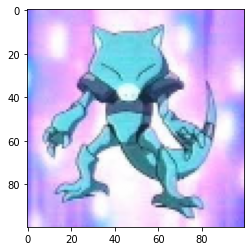

In [70]:
plt.imshow(X_train[0])

In [71]:
imageSize = 100

In [72]:
BUFFER = X_train.shape[0]
BATCH_SIZE = 32

trainingData = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER).batch(BATCH_SIZE)

# just to check dimensions
lst = list(trainingData.as_numpy_iterator())
print(len(lst))
print(len(lst[0]))
print(len(lst[-1]))
print(len(lst[0][0]))
print(len(lst[0][0][0]))
print(len(lst[0][0][0][0]))

88
32
19
100
100
3


# Models
- Discriminator model
- Generator model

In [73]:
K.backend.clear_session()

def getDiscriminatorModel():
    model = K.models.Sequential([
        layers.Conv2D(32, (3, 3), padding = 'same', input_shape = (imageSize, imageSize, 3)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        layers.Conv2D(64, (3, 3), strides = (2, 2), padding = 'same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        layers.Conv2D(128, (3, 3), strides = (2, 2), padding = 'same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        layers.Flatten(),
        layers.Dense(256),
        layers.LeakyReLU(),

        layers.Dense(1),
        layers.Activation('sigmoid')
    ])
    
    return model

In [74]:
discriminator = getDiscriminatorModel()

In [75]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

In [76]:
# from the summary above, we see that we get a 25x25x128 just before flattenning
genSize = 25
depth = 128

def getGeneratorModel():
    model = K.models.Sequential([
        layers.Dense(genSize*genSize*depth, input_shape = (100,)),
        
        # shouldn't explode
        layers.BatchNormalization(),
        layers.Reshape((genSize, genSize, depth)),
        layers.LeakyReLU(),
        
        layers.Conv2DTranspose(128, (3, 3), padding = 'same'),
        layers.LeakyReLU(),
        
        layers.Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        layers.Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        
        # at this point the image is upsampled twice so we get the original image size
        layers.Conv2DTranspose(3, (3, 3), padding = 'same'),
        layers.Activation('tanh')
    ])
    
    return model

In [77]:
generator = getGeneratorModel()

In [78]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 80000)             8080000   
_________________________________________________________________
batch_normalization_3 (Batch (None, 80000)             320000    
_________________________________________________________________
reshape (Reshape)            (None, 25, 25, 128)       0         
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 25, 25, 128)       147584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 50, 50, 64)       

In [79]:
# testing the generator with some noise
noise = tf.random.normal([1, 100])
genImg = generator(noise, training = False)
print(genImg.shape)

(1, 100, 100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


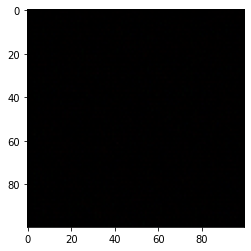

In [80]:
plt.imshow(genImg[0, :, :, :])

# Optimizers

In [182]:
genOpt = K.optimizers.Adam(lr = 1e-4, beta_1 = 0.5)
discOpt = K.optimizers.SGD(lr = 1e-4)

# Losses

In [183]:
def getGeneratorLoss(fakePreds):
    # adding real prediction loss for generator as well and seeing how it performs
    # note - did not perform well
    # losses flipped in discriminator
    # rLoss = K.losses.BinaryCrossentropy()(tf.zeros_like(realPreds), realPreds)
    # fLoss = K.losses.BinaryCrossentropy()(tf.ones_like(fakePreds), fakePreds)
    # totalLoss = rLoss + fLoss
    return K.losses.BinaryCrossentropy()(tf.ones_like(fakePreds), fakePreds)
    # return totalLoss

In [184]:
def getDiscriminatorLoss(realPreds, fakePreds):
    rLoss = K.losses.BinaryCrossentropy()(tf.ones_like(realPreds), realPreds)
    fLoss = K.losses.BinaryCrossentropy()(tf.zeros_like(fakePreds), fakePreds)
    totalLoss = rLoss + fLoss
    return totalLoss

# Training

In [185]:
EPOCHS = 50

In [186]:
genLoss = []
discLoss = []

def train(dataset, epochs):

    gLoss = None
    dLoss = None

    for epoch in range(epochs):

        for pokemon in dataset:
            gLoss, dLoss = trainStep(pokemon)
        
        genLoss.append(gLoss)
        discLoss.append(dLoss)

        print("Running epoch : " + str(epoch + 1))

        if (epoch+1)%5 == 0:
          print("Generator loss : " + str(gLoss))
          print("Discriminator loss : " + str(dLoss))

In [187]:
# this decorator is used to 
@tf.function
def trainStep(images):
    noise = tf.random.normal([BATCH_SIZE, 100])
    
    with tf.GradientTape() as gen, tf.GradientTape() as disc:
        genImages = generator(noise, training = True)
        
        realOP = discriminator(images, training = True)
        fakeOP = discriminator(genImages, training = True)
        
        genLoss = getGeneratorLoss(fakeOP)
        discLoss = getDiscriminatorLoss(realOP, fakeOP)
        
    genGrads = gen.gradient(genLoss, generator.trainable_variables)
    discGrads = disc.gradient(discLoss, discriminator.trainable_variables)
    
    genOpt.apply_gradients(zip(genGrads, generator.trainable_variables))
    discOpt.apply_gradients(zip(discGrads, discriminator.trainable_variables))

    return genLoss, discLoss

In [188]:
train(trainingData, EPOCHS)

Running epoch : 1
Running epoch : 2
Running epoch : 3
Running epoch : 4
Running epoch : 5
Generator loss : tf.Tensor(0.49166542, shape=(), dtype=float32)
Discriminator loss : tf.Tensor(2.1721773, shape=(), dtype=float32)
Running epoch : 6
Running epoch : 7
Running epoch : 8
Running epoch : 9
Running epoch : 10
Generator loss : tf.Tensor(0.5147878, shape=(), dtype=float32)
Discriminator loss : tf.Tensor(1.8280057, shape=(), dtype=float32)
Running epoch : 11
Running epoch : 12
Running epoch : 13
Running epoch : 14
Running epoch : 15
Generator loss : tf.Tensor(0.49895066, shape=(), dtype=float32)
Discriminator loss : tf.Tensor(1.938019, shape=(), dtype=float32)
Running epoch : 16
Running epoch : 17
Running epoch : 18
Running epoch : 19
Running epoch : 20
Generator loss : tf.Tensor(0.5257113, shape=(), dtype=float32)
Discriminator loss : tf.Tensor(1.7517502, shape=(), dtype=float32)
Running epoch : 21
Running epoch : 22
Running epoch : 23
Running epoch : 24
Running epoch : 25
Generator los

Text(0.5, 1.0, 'Generator loss')

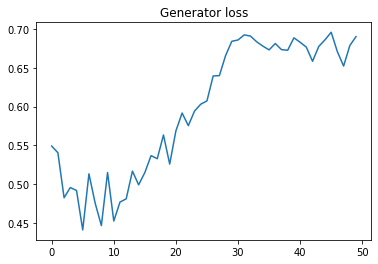

In [189]:
plt.plot(range(EPOCHS), genLoss)
plt.title('Generator loss')

Text(0.5, 1.0, 'Discriminator loss')

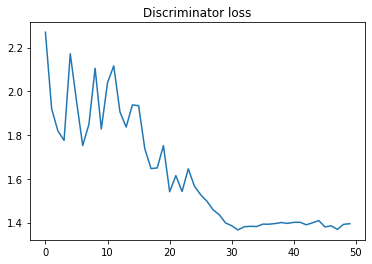

In [190]:
plt.plot(range(EPOCHS), discLoss)
plt.title('Discriminator loss')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


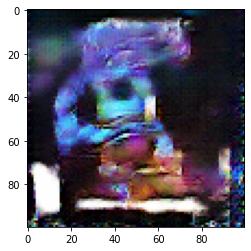

In [221]:
plt.imshow(generator(tf.random.normal([1, 100]))[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


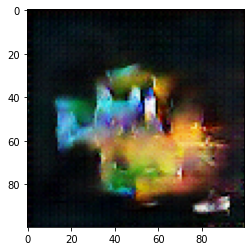

In [222]:
plt.imshow(generator(tf.random.normal([1, 100]))[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


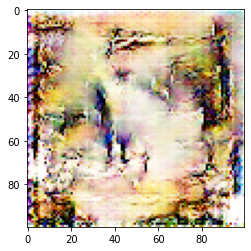

In [223]:
plt.imshow(generator(tf.random.normal([1, 100]))[0, :, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


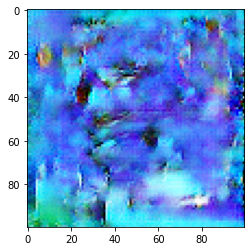

In [224]:
plt.imshow(generator(tf.random.normal([1, 100]))[0, :, :, :])

In [226]:
generator.save('generator_50ep_adam_lr0.00001_b10.5.h5')
discriminator.save('discriminator_50ep_adam_lr0.00001_b10.5_sgd_lr0.00001.h5')